<a href="https://colab.research.google.com/github/FrannGallo/SistemaRecomm/blob/main/Sprint_3_V2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sistema de recomendacion de animes

### IMPORTES

In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### LLamamos todos los archivos csv descargados

In [4]:
animelist= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/animelist.csv')

In [5]:
interactions_selected = animelist[['user_id', 'anime_id', 'rating','watching_status']]

In [6]:
interactions_selected.user_id.nunique()

325770

In [6]:
interactions_selected.anime_id.nunique()
interactions_selected

,user_id,anime_id,rating,watching_status
0,0,67,9,1
1,0,6702,7,1
2,0,242,10,1
3,0,4898,0,1
4,0,21,10,1
...,...,...,...,...
109224742,353404,507,7,2
109224743,353404,392,9,2
109224744,353404,882,6,2
109224745,353404,883,8,2


Para que podamos correr el notebook con los recursos disponibles, limitaremos la cantidad de usuarios.

Vamos a seleccionar 20.000 usuarios random (no nos alcanza la ram que nos da colab para más que esto)

In [7]:
import random
random.seed(0)

selected_users = random.sample(list(interactions_selected['user_id'].unique()), k=20000)     #Elegimos una muestra de 20000 porque es lo maximo que nos deja

interactions_selected = interactions_selected[interactions_selected['user_id'].isin(selected_users)]

interactions_selected.to_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/anime20000v1.csv', index=False)

In [9]:
interactions_selected

,user_id,anime_id,rating,watching_status
2568,12,32301,0,1
2569,12,857,0,1
2570,12,25013,0,1
2571,12,34051,0,1
2572,12,32171,0,1
...,...,...,...,...
109223353,353396,339,0,6
109223354,353396,7311,0,6
109223355,353396,2001,0,6
109223356,353396,33352,0,6


### LLAMAMOS EL CSV DE ESTUDIO

In [44]:
interactions_selected= pd.read_csv('/content/drive/MyDrive/Data Science 2023/Sprints/Sprint 3/anime20000v1.csv')
interactions_selected

,user_id,anime_id,rating,watching_status
0,12,32301,0,1
1,12,857,0,1
2,12,25013,0,1
3,12,34051,0,1
4,12,32171,0,1
...,...,...,...,...
6635529,353396,339,0,6
6635530,353396,7311,0,6
6635531,353396,2001,0,6
6635532,353396,33352,0,6


### Vamos a elegir nuestro train test son  109 millones de datos por lo que vamos a tomar un muestra de 2000mil datos

In [4]:
# train = animelist.sample(n=20000, random_state=43)
# print(train.shape)
# test=animelist.sample(n=25000, random_state=43)
# test=test.iloc[15000:24999,:]
# print(test.shape)

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
interactions_selected.drop(columns= 'watching_status')

,user_id,anime_id,rating
0,12,32301,0
1,12,857,0
2,12,25013,0
3,12,34051,0
4,12,32171,0
...,...,...,...
6635529,353396,339,0
6635530,353396,7311,0
6635531,353396,2001,0
6635532,353396,33352,0


In [46]:
train, test = train_test_split(interactions_selected, test_size=0.2, random_state=42)
train=train.drop(columns= 'watching_status')
print(train.user_id.nunique())
test.user_id.nunique()   #Ejecutamos esta linea o la de arriba, si no se pisan

19976


19578

In [47]:
print(train.user_id.nunique())
test.user_id.nunique()

19976


19578

Vemos si no tenemos alguno de test en train, eso haria que los que no coiciden tendremos que hacerle un coldstart( Les recomednaremos los animes mas populares del momento)

In [9]:
test[~test.user_id.isin(train.user_id.unique())].user_id.nunique()      #isin se fija si un valor esta en el dataframe, si esta, lo marca como true, si no False, como busca los que no ~
#Practicamente todos, pero con el dataset completo, tenemos mejores resultados jeje
#Nos dice todos los usuarios que no estan en el set de train

24

In [10]:
# Pivoteamos la tabla, cambiamos columnas por indices y damos vuelta
interactions_matrix = train.pivot(index="user_id", columns="anime_id", values="rating")

In [11]:
interactions_matrix.head() #Tememos que llenar los NaN con nulos que son las peliculas que no vieron
interactions_matrix.shape

(19976, 16864)

In [12]:
interactions_matrix = interactions_matrix.fillna(0)

In [13]:
interactions_matrix

anime_id,1,5,6,7,8,15,16,17,18,19,...,48418,48425,48426,48438,48441,48456,48471,48483,48488,48491
user_id,,,,,,,,,,,,,,,,,,,,,
12,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
36,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
57,0.0,8.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
58,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
71,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
353339,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353362,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
353381,8.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Transformamos la matris por mucha dispercion y gran cantidad de datos

In [14]:
from scipy.sparse import csr_matrix

In [15]:
interactions_matrix_csr = csr_matrix(interactions_matrix.values)

In [16]:
interactions_matrix_csr      #El modelo necesita una matiz sparsida para funcionar

<19976x16864 sparse matrix of type '<class 'numpy.float64'>'
	with 3027508 stored elements in Compressed Sparse Row format>

La siguiente celda generará un diccionario que nos servirá como índice más adelante.

Tiene como keys el id de cada usuario y como valor el indice (número de fila en la matriz)

Y el diccionario para futura referencia:

In [17]:
user_id = list(interactions_matrix.index)
user_dict = {}
counter = 0
for i in user_id:
    user_dict[i] = counter
    counter += 1

In [18]:
item_id = list(interactions_matrix.columns)
item_dict = {}
counter = 0
for i in item_id:
    item_dict[i] = counter
    counter += 1

In [19]:
user_dict

{12: 0,
 36: 1,
 57: 2,
 58: 3,
 71: 4,
 89: 5,
 94: 6,
 136: 7,
 145: 8,
 201: 9,
 209: 10,
 216: 11,
 241: 12,
 254: 13,
 266: 14,
 298: 15,
 339: 16,
 343: 17,
 353: 18,
 362: 19,
 368: 20,
 378: 21,
 419: 22,
 423: 23,
 431: 24,
 451: 25,
 458: 26,
 473: 27,
 532: 28,
 537: 29,
 542: 30,
 564: 31,
 584: 32,
 588: 33,
 595: 34,
 604: 35,
 628: 36,
 642: 37,
 657: 38,
 660: 39,
 672: 40,
 711: 41,
 713: 42,
 732: 43,
 739: 44,
 748: 45,
 785: 46,
 795: 47,
 802: 48,
 808: 49,
 855: 50,
 856: 51,
 861: 52,
 870: 53,
 872: 54,
 881: 55,
 895: 56,
 898: 57,
 935: 58,
 936: 59,
 937: 60,
 941: 61,
 988: 62,
 993: 63,
 1018: 64,
 1042: 65,
 1050: 66,
 1060: 67,
 1073: 68,
 1103: 69,
 1123: 70,
 1230: 71,
 1268: 72,
 1276: 73,
 1287: 74,
 1310: 75,
 1312: 76,
 1323: 77,
 1335: 78,
 1348: 79,
 1408: 80,
 1454: 81,
 1473: 82,
 1503: 83,
 1532: 84,
 1564: 85,
 1571: 86,
 1582: 87,
 1640: 88,
 1677: 89,
 1722: 90,
 1727: 91,
 1740: 92,
 1754: 93,
 1758: 94,
 1762: 95,
 1775: 96,
 1796: 97,
 18

## Vamos a generar el modelo predictivo

In [20]:
pip install lightfm

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 316.4/316.4 kB 5.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lightfm: filename=lightfm-1.17-cp310-cp310-linux_x86_64.whl size=808303 sha256=234123587edf67ef0d73b979ad3deb243637987787675b86d9be36752e1345e5
  Stored in directory: /root/.cache/pip/wheels/4f/9b/7e/0b256f2168511d8fa4dae4fae0200fdbd729eb424a912ad636
Successfully built lightfm


In [21]:
from lightfm import LightFM

In [72]:
model = LightFM(learning_rate=0.05,
                no_components=100)

In [73]:
model = model.fit(interactions_matrix_csr,
                  epochs=20, verbose=True)

Epoch: 100%|██████████| 20/20 [04:30<00:00, 13.52s/it]


Y ahora definimos la funcion para obtener recomendaciones para un usuario en específico:

In [74]:
import numpy as np

In [75]:
def recomm(model, interactions, user_id, user_dict, item_dict, nrec_items = 20, show = True):     #nrec numero de recomendaciones

    n_users, n_items = interactions.shape
    user_x = user_dict[user_id]

    scores = pd.Series(model.predict(user_x,np.arange(n_items)))
    scores.index = interactions.columns
    scores = list(pd.Series(scores.sort_values(ascending=False).index))

    known_items = list(pd.Series(interactions.loc[user_id,:] \
                                [interactions.loc[user_id,:] > 0].index).sort_values(ascending=False))

    #Filtro de items que ya leyó el usuario
    scores = [x for x in scores if x not in known_items]
    recomms = scores[0:nrec_items]

    if show == True:
        print ("User: " + str(user_id))
        print("Known Likes:")
        counter = 1
        for i in known_items:
            print(str(counter) + '- ' + str(i))
            counter+=1

        print("\n Recommended Items:")

        counter = 1
        for i in recomms:
            print(str(counter) + '- ' + str(i))
            counter+=1
    return recomms

Probamos la función para un usuario al azar. Al poner la opción show=True nos imprime los known likes y recomms.



In [76]:
recomms_test = recomm(model, interactions_matrix, 12 , user_dict, item_dict, show=True)

User: 12
Known Likes:
1- 35062
2- 34497
3- 33486
4- 31964
5- 28121
6- 27775
7- 24405
8- 23321
9- 21881
10- 20785
11- 20021
12- 19369
13- 16662
14- 16524
15- 16498
16- 16417
17- 16011
18- 15225
19- 14813
20- 14749
21- 14289
22- 14283
23- 13759
24- 13667
25- 12477
26- 11759
27- 11757
28- 11375
29- 11021
30- 10589
31- 8246
32- 6325
33- 5681
34- 5114
35- 4726
36- 4437
37- 3269
38- 2472
39- 2144
40- 1735
41- 1575
42- 936
43- 873
44- 813
45- 552
46- 523
47- 431
48- 237
49- 223
50- 199
51- 121
52- 48
53- 20

 Recommended Items:
1- 1535
2- 30276
3- 6547
4- 4224
5- 22319
6- 19815
7- 9253
8- 10620
9- 2904
10- 32281
11- 226
12- 269
13- 20507
14- 9919
15- 8074
16- 2167
17- 11111
18- 31240
19- 9989
20- 31043


In [77]:
recomms_test

[1535,
 30276,
 6547,
 4224,
 22319,
 19815,
 9253,
 10620,
 2904,
 32281,
 226,
 269,
 20507,
 9919,
 8074,
 2167,
 11111,
 31240,
 9989,
 31043]

Si queremos ver el nombre de estos libros, podemos buscar en el dataset de metadata

# Métricas

Ahora para medir métricas, necesitamos:

1. Generar recomendaciones para todos los usuarios
2. Comparar lo que recomendamos contra lo que los usuarios realmente vieron (set de test).


Comencemos generando recomendaciones para todos los usuarios.

Nuestra función (recomm) sirve para generar recomendaciones personalizadas a usuarios para los cuales tenemos datos en el set de train.

Para usuarios cold start (que no aparecen en el set de train), debemos buscar alguna alternativa. En este caso les recomendaremos los libros con rating promedio más alto.

In [78]:
#Esta linea busca los promedios de los anime y saca los 10 primero, son las peliculas que vamos a recomendar si tenemos un coldstar
# que son aquellos usuarios que estan en el set de test pero no en el set de train, como no tenemos datos sobre ellos,
#les recomendamos el top 10 mejor rankeadas, tambien pueden ser las 10 mas vistas y asi
cold_start_recomms = train.groupby("anime_id").agg({"rating": "mean"})\
                      .sort_values(by="rating", ascending=False)\
                      .head(10)\
                      .index\
                      .to_list()

A todos los usuarios cold start les recomendaremos:

In [79]:
cold_start_recomms

[30975, 16994, 34717, 36585, 37326, 39200, 39171, 45518, 43444, 42317]

Ahora generemos recomendaciones para todos los usuarios.

Primero comenzamos armando un listado de usuarios "non cold" a los cuales les daremos recomms personalizadas.

In [80]:
users = interactions_selected.user_id.unique()  #Estos son todos los usuarios que hay en nuestro data ser
non_cold_users = train.user_id.unique()          #Como vemos ahi los que no son cold, que son a los que le vamos a recomendar, son practimente todos
# Menos 24 que tendrian coldstar
print(len(users), len(non_cold_users))

20000 19976


In [ ]:
from tqdm import tqdm
recomms_dict = {
    "user": [],
    "recomms": [],
    "cold": []
}

for user in tqdm(users):

  # Recomms personalizadas
  if user in non_cold_users:
    user_recomms = recomm(model, interactions_matrix, user, user_dict, item_dict, nrec_items = 10, show = False)
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(user_recomms)
    recomms_dict["cold"].append(False) #Para luego tener identificados a los usuarios cold

  # Recomms cold
  else:
    recomms_dict["user"].append(user)
    recomms_dict["recomms"].append(cold_start_recomms)
    recomms_dict["cold"].append(True) #Para luego tener identificados a los usuarios cold

 45%|████▍     | 8976/20000 [06:50<07:52, 23.34it/s]

Ahora tenemos un diccionario de recomedaciones. Lo vamos a convertir en dataframe para poder manipularlo más fácil (como estamos acostumbrados)

In [ ]:
recomms_df = pd.DataFrame(recomms_dict)

In [ ]:
recomms_df[recomms_df['cold'] == False]

In [ ]:
recomms_df.user.nunique()

In [ ]:
recomms_df.cold.value_counts()

Ahora tenemos que comparar nuestras recomms contra lo que los usuarios realmente vieron (test).



In [ ]:
test.head()

Primero ordenamos libros según los ratings (mayor a menor) que dieron los usuarios en el set de test.

Luego, agrupamos y armamos un listado de libros para cada usuario.

Este es el listado "ideal" contra el que vamos a comparar nuestras recomendaciones.

In [ ]:
#Esto ordena, por usuario y por raitng (en esa priroridad)
# Y a esto le agrega una columna de
# aca agrupa por usuario y le agrega columna de animes que alla votado
# Como es el set de test, van a ser las peliculas que deberiamos recomendarles
ideal_recomms = test[test.watching_status != 0]\
                  .groupby(["user_id"], as_index=False)\
                  .agg({"anime_id": "unique"})\
                  .head()
ideal_recomms


Ahora vamos a medir MAP. Para esto nos basaremos en este ejemplo: https://github.com/Datathon2021/Recomendador/blob/main/Ejemplos/ejemplo_map.ipynb

Sklearn también tiene funciones para medir NDCG, etc.


Primero que nada, vamos a unir en un mismo dataframe las recomendaciones nuestras con el set ideal.

In [ ]:
df_map = ideal_recomms.merge(recomms_df, how="left", left_on="user_id", right_on="user")[["user_id", "anime_id", "recomms"]]
df_map.columns = ["user_id", "ideal", "recomms"]
df_map.head()

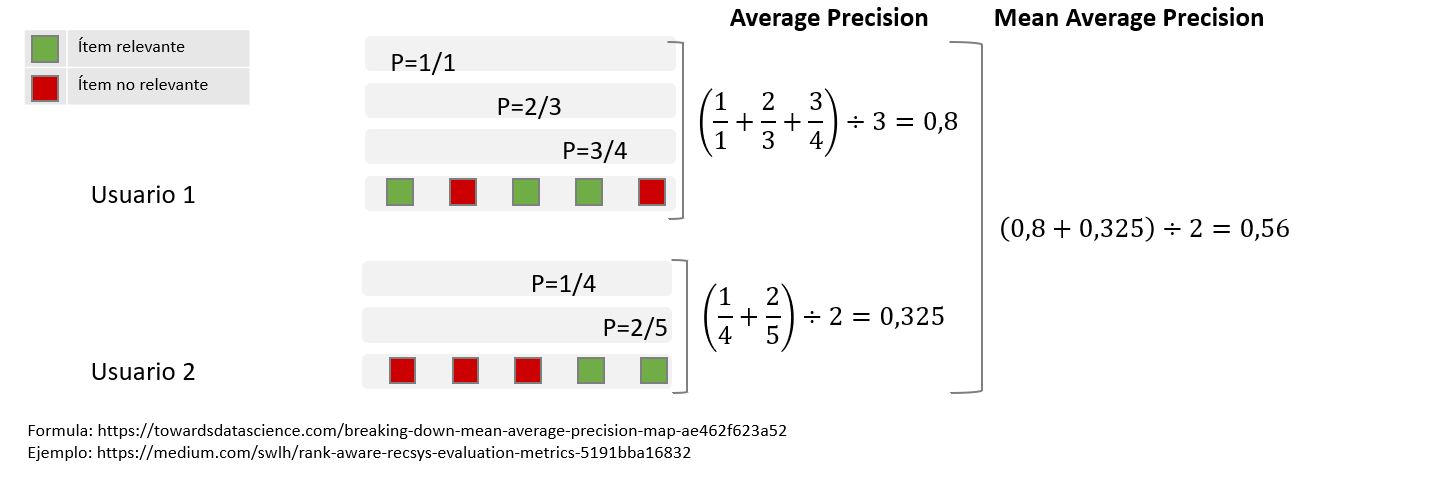

In [ ]:
aps = [] # lista vacía para ir almacenando la AP de cada recomendación

for pred, label in df_map[["ideal", "recomms"]].values:
  n = len(pred) # cantidad de elementos recomendados
  arange = np.arange(n, dtype=np.int32) + 1. # indexamos en base 1
  rel_k = np.in1d(pred[:n], label) # lista de booleanos que indican la relevancia de cada ítem
  tp = np.ones(rel_k.sum(), dtype=np.int32).cumsum() # lista con el contador de verdaderos positivos
  denom = arange[rel_k] # posiciones donde se encuentran los ítems relantes
  ap = (tp / denom).sum() / len(label) # average precision
  aps.append(ap)


In [ ]:
MAP = np.mean(aps)
print(f'mean average precision = {round(MAP, 5)}')

In [ ]:
df_map[["ideal", "recomms"]].values

In [ ]:
# np.arange(10, dtype=np.int32) + 1

In [ ]:
df_map.tail()

In [ ]:
np.in1d(pred[:n], label)